## 07e scATAC MPPs preprocessing

analysis of scATAC seq in LT-HSCs using Signac

used this docker image

docker run 
--rm 
-d 
--name signac 
-p 8880:8888 
-e JUPYTER_ENABLE_LAB=YES 
-v /Users/efast/Documents/:/home/jovyan/work 
signac_seurat:vs5

In [1]:
library(Seurat)

Warning message:
“package ‘Seurat’ was built under R version 3.6.2”

In [10]:
LT_rna <- ReadH5AD(file = "./sc_objects/old_LT_preprocessed_old_scanpy.h5ad", layers=FALSE)

Pulling expression matrices and metadata
Data is scaled
Merging feature-level metadata dataframes
Creating assay object
Storing X as scale.data and raw as data
Setting highly variable features
Pulling dimensional reduction information
Pulling cell embeddings
Pulling feature loadings
Warning message:
“No columnames present in cell embeddings, setting to 'PC_1:50'”Warning message:
“No columnames present in cell embeddings, setting to 'UMAP_1:2'”Assembling Seurat object
Finding nearest neighbor graph
Warning message:
“Adding a Graph without an assay associated with it”Not pulling layers


In [11]:
Idents(LT_rna) <- "leiden"

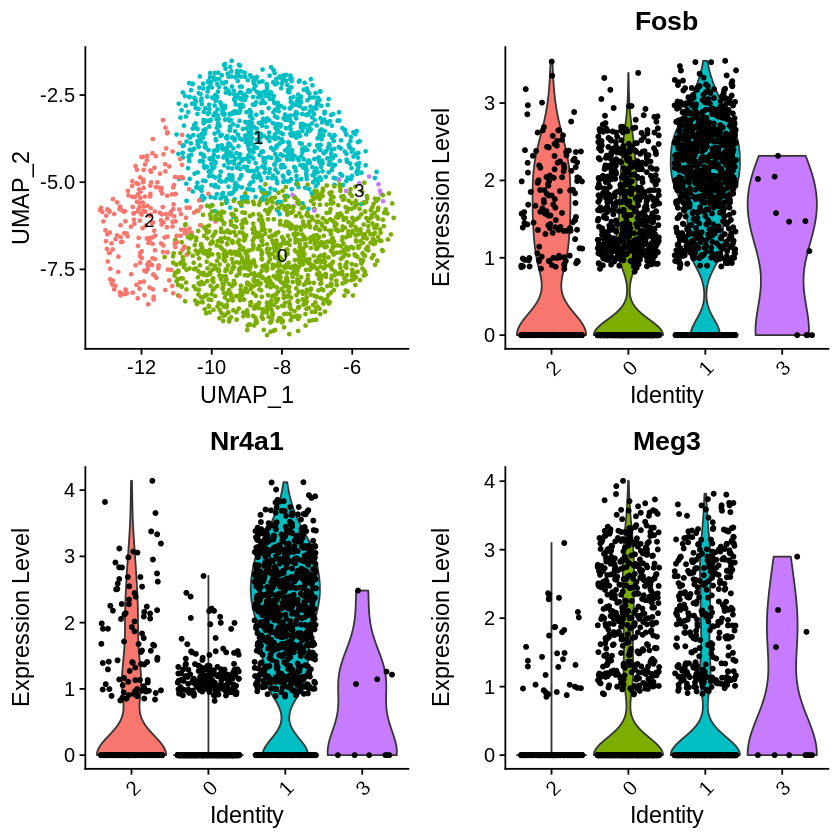

In [12]:
p1 <- DimPlot(LT_rna, label = TRUE) + NoLegend()
p2 <- VlnPlot(LT_rna, features = c("Fosb", "Nr4a1", "Meg3"), combine = FALSE)
CombinePlots(plots = c(list(p1), p2), ncol = 2, legend = "none")

In [13]:
str(LT_rna)

Formal class 'Seurat' [package "Seurat"] with 12 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       : num[0 , 0 ] 
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:4597185] 2 3 17 20 31 33 35 41 44 56 ...
  .. .. .. .. .. ..@ p       : int [1:2383] 0 2442 4397 5779 7505 9140 10689 12397 14518 16319 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 14397 2382
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:14397] "Sox17" "Mrpl15" "Lypla1" "Tcea1" ...
  .. .. .. .. .. .. ..$ : chr [1:2382] "GGCGACTAGCCTTGAT-1" "CGTTCTGCACGGTGTC-1" "AGTCTTTGTTATCCGA-1" "GCGCCAACAGTATAAG-1" ...
  .. .. .. .. .. ..@ x       : num [1:4597185] 0.907 1.692 1.375 0.907 3.845 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ scale.data   : num [1:1275, 1:2382] -0.26 -0.537 -0.338 3.048 -0.066 ...
  .. .. .. .. ..- attr(*, "dimnames")=L

In [14]:
head(LT_rna[[]])

,nFeatures_RNA,percent.mito,nCount_RNA,Female,rXist,Female.cat,leiden
,<int>,<dbl>,<dbl>,<lgl>,<dbl>,<int>,<int>
GGCGACTAGCCTTGAT-1,2445,0.03558771,6772,TRUE,3.605668,1,2
CGTTCTGCACGGTGTC-1,1955,0.03731491,5065,FALSE,0.010000,0,0
AGTCTTTGTTATCCGA-1,1383,0.03178401,2926,TRUE,2.695841,1,0
GCGCCAACAGTATAAG-1,1726,0.03520634,4289,FALSE,0.010000,0,1
CAGAGAGCAGATCGGA-1,1636,0.03635051,4154,FALSE,0.010000,0,1
TACCTTAGTACGACCC-1,1549,0.04944630,3883,FALSE,0.010000,0,1


In [15]:
# Retrieve specific values from the metadata

#LT_rna$nCount_RNA

head(LT_rna[[c("percent.mito", "nFeatures_RNA")]])


,percent.mito,nFeatures_RNA
,<dbl>,<int>
GGCGACTAGCCTTGAT-1,0.03558771,2445
CGTTCTGCACGGTGTC-1,0.03731491,1955
AGTCTTTGTTATCCGA-1,0.03178401,1383
GCGCCAACAGTATAAG-1,0.03520634,1726
CAGAGAGCAGATCGGA-1,0.03635051,1636
TACCTTAGTACGACCC-1,0.04944630,1549


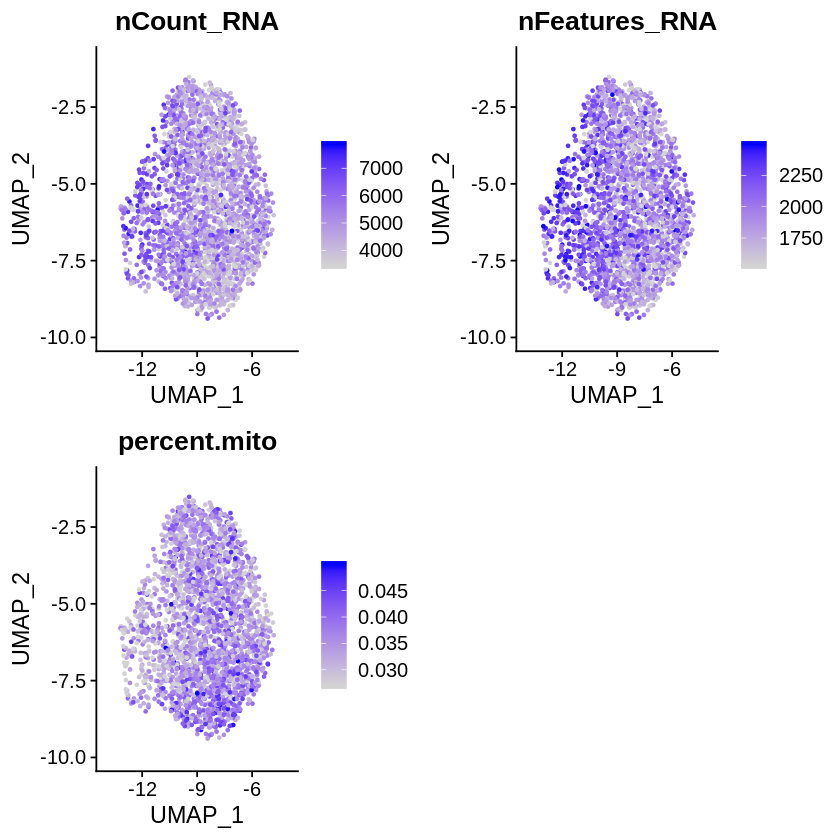

In [16]:
FeaturePlot(LT_rna, features = c("nCount_RNA", "nFeatures_RNA", "percent.mito"), ncol = 2, min.cutoff = "q9")

In [19]:
?Seurat::Dimplot

No documentation for ‘Dimplot’ in specified packages and libraries:
you could try ‘??Dimplot’

In [ ]:
nFeature_RNA

In [ ]:
pbmc3k <- ReadH5AD(file = "/home/jovyan/work/X_likely_trash/Data/190924_oldLTpreprocessing_excludedcells_DaviesBouldin.h5ad")
Idents(pbmc3k) <- "louvain"
p1 <- DimPlot(pbmc3k, label = TRUE) + NoLegend()
p2 <- VlnPlot(pbmc3k, features = c("CST3", "NKG7", "PPBP"), combine = FALSE)
CombinePlots(plots = c(list(p1), p2), ncol = 2, legend = "none")